# Kurtosis Graphs
Page 82

Importing audio file and plot

Check


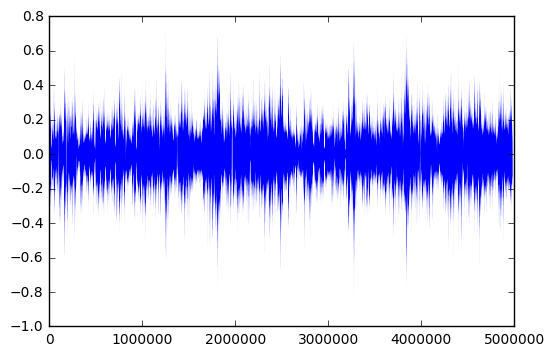

In [1]:
# Re-creating of the kurtosis graphs in page 82
# It is different though, we didn't do STFT to calculate the data that is to be plotted.

import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import soundfile as sf 
import os
from scipy.stats import kurtosis

print ("Check")
# start_time = time.time()

# read file
fileDir = os.path.dirname(os.path.realpath('__file__'))
file_name = os.path.join(fileDir, '../sounds/never ever.wav')
file_name = os.path.abspath(os.path.realpath(file_name))
ref, sample_rate = sf.read(file_name)

t_start = 02.5
t_end = 115.5
signal = ref[int(t_start * 44100): int(t_end * 44100), 0]
signal_length = len(signal)

# add noise so that silent parts will not give ambiguous values
# signal = np.add(signal, 0.001*np.random.randn(len(signal)))
# sd.play(signal, sample_rate)

plt.plot(signal, lw=0.01)
plt.show()

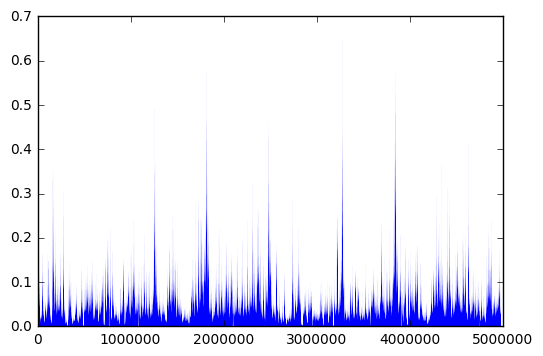

In [2]:
# taking absolute (L1 norm or L2 norm)
signal_square = np.multiply(signal, signal)  # L2 norm
# signal_square = signal
# signal_square = np.absolute(signal)  # L1 norm

plt.plot(signal_square, lw=0.01)
plt.show()

Take the sum of each window

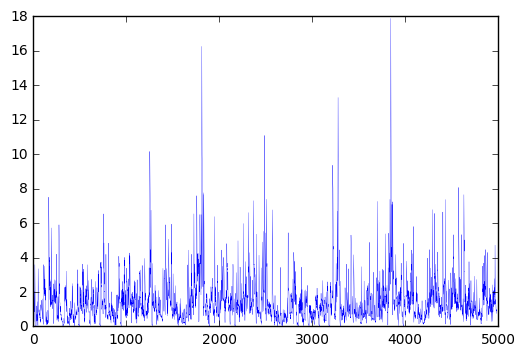

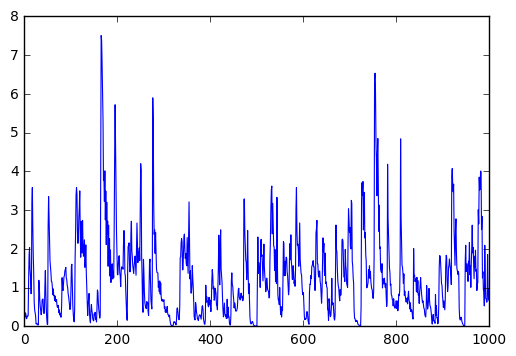

In [3]:
# the size/width of the window that is used to sum
# the book uses a certain frequency which is the result from the STFT.
window_size = 1000
number_of_windows = len(signal) / window_size

# calculating the "energy" of each window
# not according to the book though
window_type = 'rect'
# rect, trig, or sin2

if window_type == 'rect':
    energy = [np.sum(signal_square[x:x + window_size]) 
              for x in range(0, signal_length - window_size, window_size)] # rectangular window
elif window_type == 'sin2':
    window_function = [(np.sin(np.pi * x / window_size)) ** 2 
                       for x in range(window_size)]
    energy = [np.sum(np.multiply(signal_square[x:x + window_size],window_function)) 
              for x in range(signal_length - window_size)]
    #energy = 1 / (float(window_size)) ** (3.0 / 4.0) * np.array(energy)  # maybe not necessary
elif window_type == 'trig':
    window_function = [1.0 - np.absolute(2*x / window_size - 1.0) 
                       for x in range(window_size)]
    energy = [np.sum(np.multiply(signal_square[x:x + window_size],window_function)) 
              for x in range(signal_length - window_size)]
    #energy = 1 / (float(window_size)) ** (3.0 / 4.0) * np.array(energy)  # maybe not necessary

# scaling down arbitrarily, originally for viewing against the signal
energy = 1.0 / (float(window_size)) ** (1.0 / 4.0) * np.array(energy)

# energy_noise = 0  # adding noise to energy sequence, to "smoothen"
# if energy_noise != 0:
#     energy = np.add(energy, energy_noise*np.random.randn(len(energy)))

plt.plot(energy, lw=0.2)
plt.show()

plt.plot(energy[0:1000], lw=0.8)
plt.show()

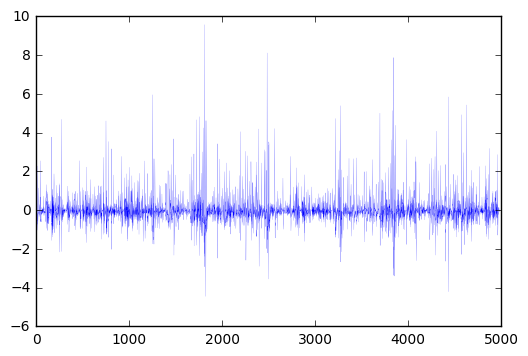

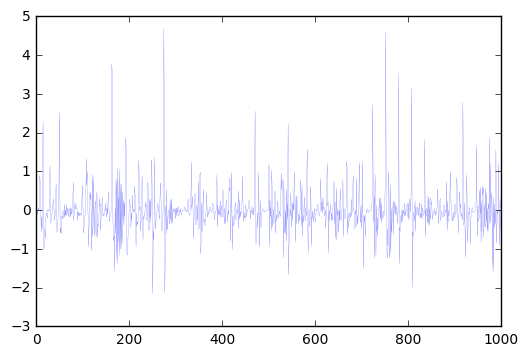

In [4]:
difference = [(energy[x+1] - energy[x]) for x in range(len(energy) - 1)]
# difference between the energy of each of the snippet
# this is what we are interested in

plt.plot(difference, lw=0.1)
plt.show()

plt.plot(difference[0:1000], lw=0.1)
plt.show()

# difference = energy  # for experimental purposes

In [5]:
# Statisical calcuations
# Calculation of mean and variance
mean_mean = np.mean(difference)  # mean
std_std = np.std(difference)  # std_dev
print "mean: {}".format(mean_mean)
print "stddev: {}".format(std_std)

mean: 0.000125500434049
stddev: 0.730737872669


In [6]:
# Standardising mean and variance
difference = np.add(difference, [-mean_mean]*len(difference))
difference = 1.0/std_std * np.array(difference)

mean_mean = np.mean(difference)  # mean
std_std = np.std(difference)  # std_dev
# print "mean: {}".format(mean_mean)
# print "stddev: {}".format(std_std)

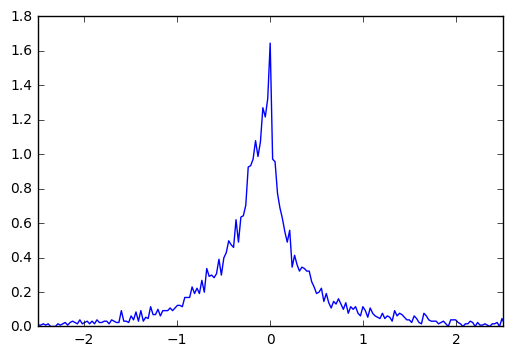

In [7]:
# building a histogram
number_of_bars = 999
# histogram = [0.0]*(number_of_bars)
extreme = max(np.absolute(difference))
interval = (2.*extreme)/number_of_bars
# histogram_entry = 0

# print(len(difference))
# print(number_of_bars)
# print(interval)

hist, bin_array = np.histogram(difference, 
                               bins=number_of_bars, 
                               range=(-extreme, extreme), 
                               density=True)
plt.plot(np.arange(-extreme + interval/2.0, extreme + interval/2.0, interval),hist)
ax = plt.gca()  # this snippet is necessary to change the limits of the graph
ax.set_xlim([-2.5*std_std, 2.5*std_std])
plt.show()

# populating the histogram
# for x in np.arange(-extreme + interval/2.0, extreme + interval/2.0, interval):
#     for entry in difference:
#         if (entry > x) and (entry < interval + x):
#             histogram[histogram_entry] += 1.0/(len(difference)*interval)
#             # possible float/integer error
#     histogram_entry += 1

Calculate the area under the graph

In [8]:
print "area under graph: {}".format(np.sum(hist)*interval)
# print "area under graph: {}".format(interval*np.sum([1/(std_std*np.sqrt(2*np.pi))*
#           np.exp(-(x - mean_mean)**2 / (2*(std_std)**2))
#           for x in np.arange(-extreme, extreme, interval)]))

area under graph: 1.0


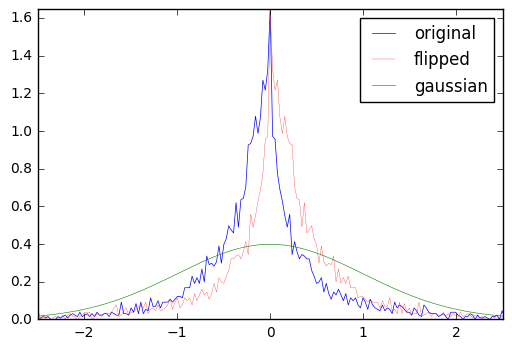

In [21]:
# plotting histogram against normal distribution
plt.plot(np.arange(-extreme + interval/2.0, extreme + interval/2.0, interval),
         hist, lw=0.5, color='b', label='original')
plt.plot(np.arange(-extreme + interval/2.0, extreme + interval/2.0, interval),
         hist[::-1], lw=0.2, color='r', label='flipped')
plt.plot(np.arange(-extreme, extreme, interval),
         [1/(std_std*np.sqrt(2*np.pi))*
          np.exp(-(x - mean_mean)**2 / (2*(std_std)**2))
          for x in np.arange(-extreme, extreme, interval)],
        lw=0.4, color='g', label="gaussian")
ax = plt.gca()  # this snippet is necessary to change the limits of the graph
ax.set_ylim([0, np.max(hist)])
ax.set_xlim([-2.5*std_std, 2.5*std_std])
plt.legend(loc="best")
plt.show()

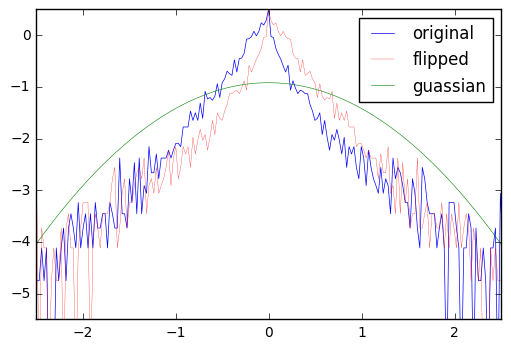

In [23]:
# taking the log of the histogram
hist_log = [np.log(entry + 0.001) for entry in hist]

# plotting histogram against log-normal distribution
plt.plot(np.arange(-extreme + interval/2.0, extreme + interval/2.0, interval),
         hist_log, lw=0.5, color='b', label="original")
plt.plot(np.arange(-extreme + interval/2.0, extreme + interval/2.0, interval),
         hist_log[::-1], lw=0.2, color='r', label="flipped")
plt.plot(np.arange(-extreme, extreme, interval),
         [-(x - mean_mean)**2 / (2*(std_std)**2)
          - np.log(std_std*np.sqrt(2*np.pi))
          for x in np.arange(-extreme, extreme, interval)], 
         lw=0.4, color='g', label="guassian")
ax = plt.gca()  # this snippet is necessary to change the limits of the graph
ax.set_ylim([-5.5, np.max(hist_log)])
ax.set_xlim([-2.5*std_std, 2.5*std_std])
plt.legend(loc="best")
plt.show()


In [11]:
#difference = np.random.randn(10000)  # for testing
mean_mean = np.mean(difference)  # mean
std_std = np.std(difference)  # std_dev
meenus = np.add(difference, [-mean_mean]*len(difference))
meenus_4 = np.sum(np.power(meenus, 4))
print "kurtosis: {}".format(-3 + meenus_4/(len(difference)*std_std**4))  # excess kurtosis

# calculation with in built method
print "kurtosis: {}".format(kurtosis(difference))  # Fisher's  definition (normal ==> 0.0)

kurtosis: 25.11298428
kurtosis: 25.11298428
